In [40]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

data = pd.read_csv("Crop_recommendation (1).csv") 
print(data.info())  
print(data.describe()) 
print(data.isnull().sum()) 
print(data['label'].value_counts())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None
                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    

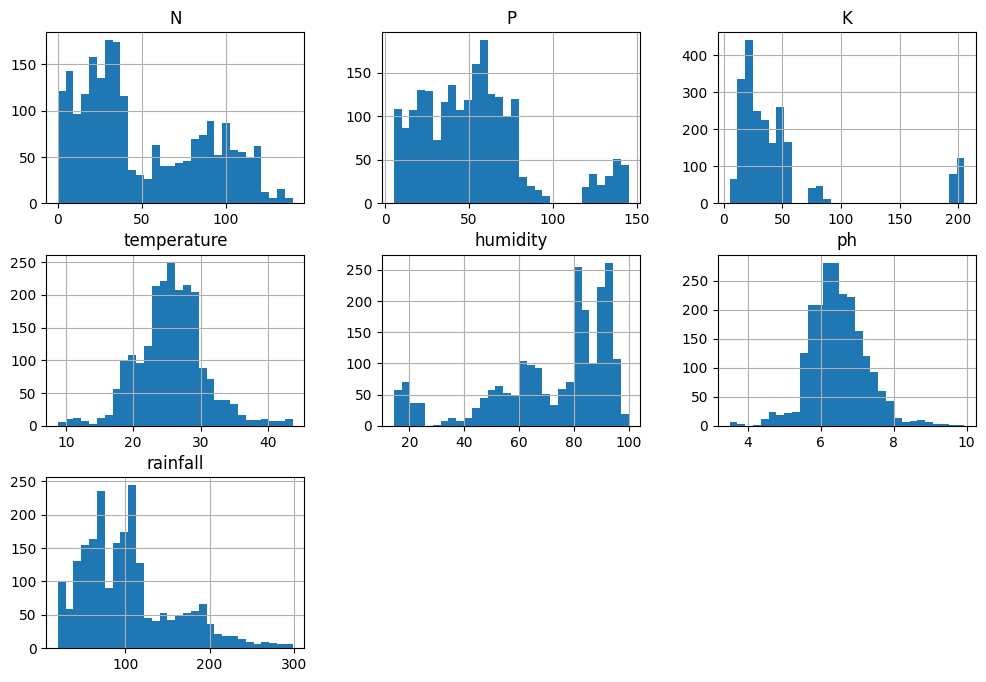

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
data.hist(figsize=(12,8),bins=30)
plt.show()

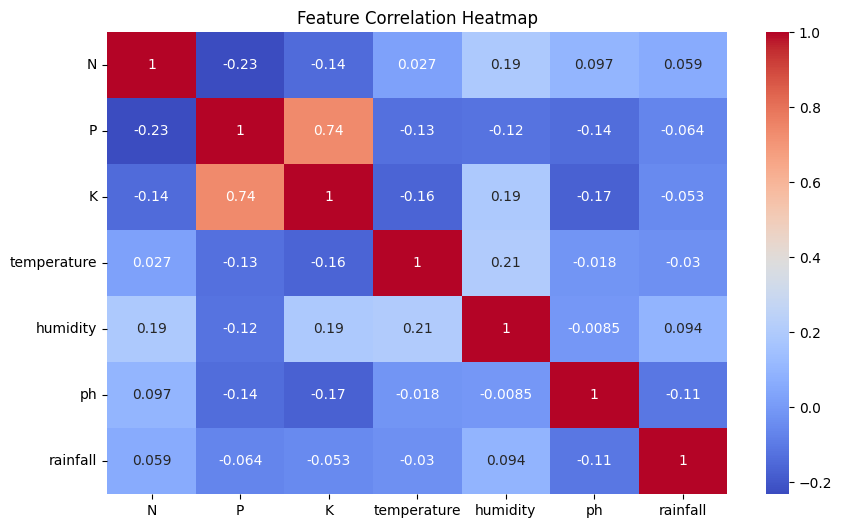

In [42]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.drop(columns=['label']).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Strong Positive Correlation:
Phosphorus (P) and Potassium (K) → 0.74 : Indicates that higher phosphorus levels are associated with higher potassium levels in the soil.
Phosphorus (P) and Nitrogen (N) → -0.23 : Weak negative correlation, meaning an increase in phosphorus might slightly reduce nitrogen levels.

Weak Correlations:
Most features (temperature, humidity, pH, and rainfall) show very weak correlations with nitrogen, phosphorus, and potassium.
Temperature and Humidity → 0.21 : A slight positive correlation suggests that as temperature increases, humidity may also increase slightly.

Minimal Influence of pH and Rainfall:
pH shows very weak correlations with other features, indicating that soil acidity does not have a strong relationship with other numerical factors in this dataset.
Rainfall has almost no correlation with other variables, suggesting it is an independent factor in determining crop recommendations.


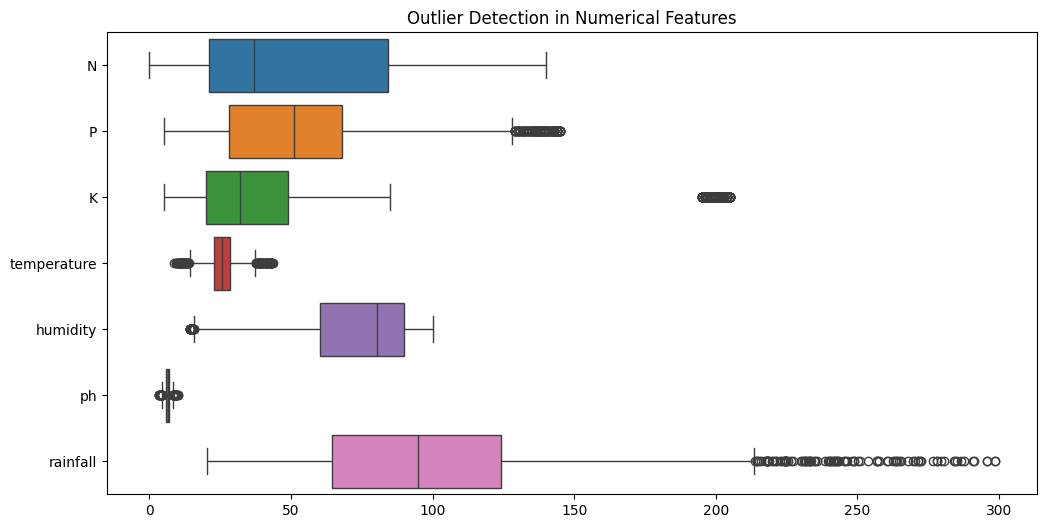

In [43]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data.drop(columns=['label']), orient="h")
plt.title("Outlier Detection in Numerical Features")
plt.show()


Nitrogen (N), Phosphorus (P), and Potassium (K) : The N, P, and K distributions have some mild outliers beyond the upper whisker.
                                                  Phosphorus (P) has a few strong outliers, indicating some extreme values in the dataset.

Temperature : The distribution of temperature is tightly packed.A few minor outliers exist on both lower and upper ends.

Humidity : A few lower-end outliers suggest some unexpectedly low humidity values in the dataset.

pH Levels : The pH feature has several small outliers on the lower end, indicating extreme acidity levels in some observations.

Rainfall : Significant number of outliers on the upper end, meaning some regions experience extreme rainfall values compared to the majority of the dataset.

In [ ]:
scaler = StandardScaler()
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

print(data.head())

          N         P         K  temperature  humidity        ph  rainfall  \
0  1.068797 -0.344551 -0.101688    -0.935587  0.472666  0.043302  1.810361   
1  0.933329  0.140616 -0.141185    -0.759646  0.397051  0.734873  2.242058   
2  0.255986  0.049647 -0.081939    -0.515898  0.486954  1.771510  2.921066   
3  0.635298 -0.556811 -0.160933     0.172807  0.389805  0.660308  2.537048   
4  0.743673 -0.344551 -0.121436    -1.083647  0.454792  1.497868  2.898373   

  label  
0  rice  
1  rice  
2  rice  
3  rice  
4  rice  


In [45]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = data.drop('label', axis=1)
y = data['label']

X_train_valid, X_unseen, y_train_valid, y_unseen = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.10, random_state=42, stratify=y_train_valid)

print(f"Training Data: {X_train.shape}, Validation Data: {X_valid.shape}, Unseen Test Data: {X_unseen.shape}")


Training Data: (1782, 7), Validation Data: (198, 7), Unseen Test Data: (220, 7)


In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=1, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

y_valid_pred = model.predict(X_valid)
conf_matrix = confusion_matrix(y_valid, y_valid_pred)
class_report = classification_report(y_valid, y_valid_pred)
valid_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f"Validation Accuracy: {valid_accuracy:.4f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Validation Accuracy: 0.9949

Confusion Matrix:
 [[9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 8 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 9 0 0]
 [0 0 0 0 0 

In [47]:
y_unseen_pred = model.predict(X_unseen)

unseen_accuracy = accuracy_score(y_unseen, y_unseen_pred)
print(f"Unseen Test Accuracy: {unseen_accuracy:.4f}")

conf_matrix = confusion_matrix(y_unseen, y_unseen_pred)
class_report = classification_report(y_unseen, y_unseen_pred)

print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Unseen Test Accuracy: 0.9909

Confusion Matrix:
 [[10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  9  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 10  0  0  0  

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib

y = data['label']  

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
data['label'] = y_encoded

# Train model
X = data.drop(['label'], axis=1)
model = RandomForestClassifier()
model.fit(X, y_encoded)

# Save both model and the correct label encoder
joblib.dump(model, 'crop_recommendation_model.joblib')
joblib.dump(label_encoder, 'label_encoder.joblib')

# Debug: Print classes to verify
print("✅ Saved label encoder classes:")
print(label_encoder.classes_)


✅ Saved label encoder classes:
['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [49]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

feature_importances = np.argsort(rf.feature_importances_)[::-1]
print("Feature importance ranking:")
for i in feature_importances:
    print(f"{X.columns[i]}: {rf.feature_importances_[i]:.4f}")


Feature importance ranking:
rainfall: 0.2233
humidity: 0.2037
K: 0.1815
P: 0.1504
N: 0.1039
temperature: 0.0856
ph: 0.0516


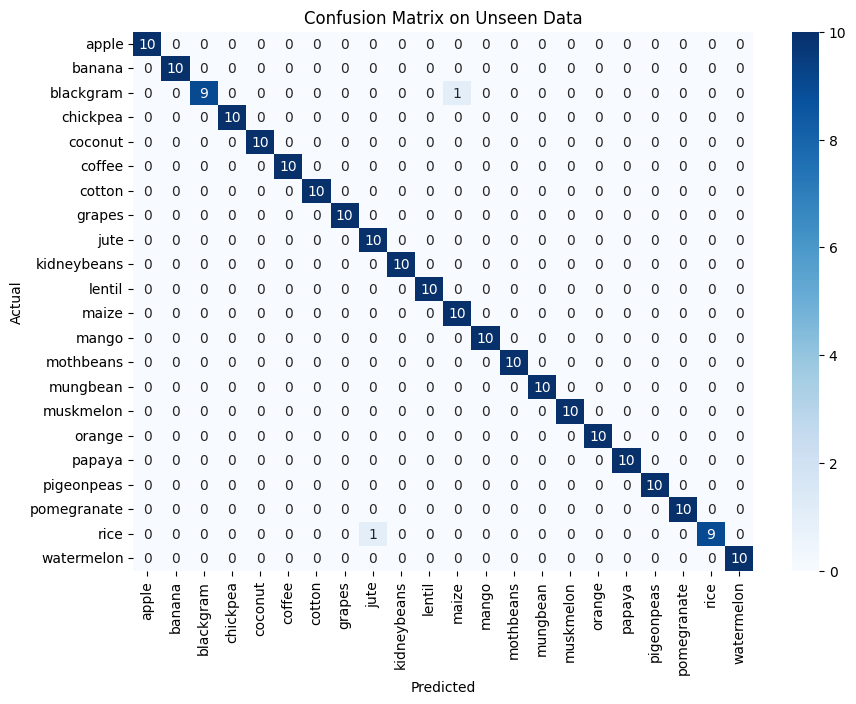

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_unseen, y_unseen_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix on Unseen Data")
plt.show()


In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_unseen)

print("Optimized Accuracy:", accuracy_score(y_unseen, y_pred_best))


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Optimized Accuracy: 0.990909090909091


In [ ]:
# import numpy as np
# import joblib
# import requests

# model = joblib.load("crop_recommendation_model.joblib")
# print("Model loaded successfully!")

# feature_names = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

# def get_location():
#     try:
#         response = requests.get("https://ipinfo.io/json", timeout=5)  # Timeout in 5s
#         data = response.json()
#         lat, lon = map(float, data["loc"].split(","))
#         print(f"Detected Location: {data['city']}, {data['region']} (Lat: {lat}, Lon: {lon})")
#         return lat, lon
#     except requests.exceptions.Timeout:
#         print("Location API Timeout. Please enter manually.")
#         return None, None
#     except Exception as e:
#         print(f"Location Error: {e}")
#         return None, None

# def get_weather_data(lat, lon):
#     weather_url = f"https://api.open-meteo.com/v1/forecast?latitude={lat}&longitude={lon}&current=temperature_2m,relative_humidity_2m,precipitation"
    
#     try:
#         response = requests.get(weather_url, timeout=5)  
#         weather_data = response.json()
        
#         if "current" in weather_data:
#             temperature = weather_data["current"]["temperature_2m"]
#             humidity = weather_data["current"]["relative_humidity_2m"]
#             rainfall = weather_data["current"].get("precipitation", 0)  # Default 0 if no data
            
#             print(f"Weather Data - Temperature: {temperature}°C, Humidity: {humidity}%, Rainfall: {rainfall}mm")
#             return temperature, humidity, rainfall
#         else:
#             print("Error fetching weather data.")
#             return None, None, None
#     except requests.exceptions.Timeout:
#         print("Weather API Timeout. Using default values.")
#         return 25.0, 60.0, 5.0  
#     except Exception as e:
#         print(f"Weather API Error: {e}")
#         return None, None, None

# def get_user_input():
#     user_data = []

#     lat, lon = get_location()

#     if lat is not None and lon is not None:
#         temperature, humidity, rainfall = get_weather_data(lat, lon)
#     else:
#         print("Enter weather data manually:")
#         temperature = float(input("Temperature (°C): ") or 25.0)  
#         humidity = float(input("Humidity (%): ") or 60.0)  
#         rainfall = float(input("Rainfall (mm): ") or 5.0)  

#     print("Enter the values for the remaining features:")
#     for feature in ["N", "P", "K", "ph"]:
#         while True:
#             try:
#                 value = float(input(f"{feature}: ") or 0.0)  
#                 user_data.append(value)
#                 break
#             except ValueError:
#                 print(f"Invalid input for {feature}. Please enter a number.")

#     user_data.extend([temperature, humidity, rainfall])
    
#     return np.array(user_data).reshape(1, -1)

# user_input = get_user_input()

# probabilities = model.predict_proba(user_input)

# crop_labels = model.classes_

# threshold = 0.75  

# filtered_crops = [(crop_labels[idx], probabilities[0][idx]) for idx in np.argsort(probabilities[0])[::-1] if probabilities[0][idx] >= threshold]

# if filtered_crops:
#     print("\nRecommended Crops")
#     for crop, confidence in filtered_crops:
#         print(f"{crop}: {confidence * 100:.2f}% confidence")
# else:
#     print("\nNo crops found.")


Model loaded successfully!
Detected Location: Bengaluru, Karnataka (Lat: 12.9719, Lon: 77.5937)
Weather Data - Temperature: 25.0°C, Humidity: 61%, Rainfall: 0.0mm
Enter the values for the remaining features:

No crops found.


c:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [54]:
import numpy as np
import joblib
import pandas as pd

# Load the model
model = joblib.load("crop_recommendation_model.joblib")
print("Model loaded successfully!")

# Define the feature names as used in the model
feature_names = ["N", "P", "K", "temperature", "humidity", "ph", "rainfall"]

def get_user_input():
    user_data = []

    print("Enter the weather data manually:")
    temperature = float(input("Temperature (°C): ") or 25.0)  
    humidity = float(input("Humidity (%): ") or 60.0)  
    rainfall = float(input("Rainfall (mm): ") or 5.0)  

    user_data.extend([temperature, humidity, rainfall])
    
    print("Enter the values for the remaining features:")
    for feature in ["N", "P", "K", "ph"]:
        while True:
            try:
                value = float(input(f"{feature}: ") or 0.0)  
                user_data.append(value)
                break
            except ValueError:
                print(f"Invalid input for {feature}. Please enter a number.")

    # Convert user input into a DataFrame with proper feature names
    input_data = pd.DataFrame([user_data], columns=feature_names)
    return input_data

user_input = get_user_input()

# Predict probabilities
probabilities = model.predict_proba(user_input)

# Get crop labels (target classes)
crop_labels = model.classes_

# Set a threshold for recommendations
threshold = 0.75  

# Filter crops with probabilities above the threshold
filtered_crops = [(crop_labels[idx], probabilities[0][idx]) for idx in np.argsort(probabilities[0])[::-1] if probabilities[0][idx] >= threshold]

# Output the results
if filtered_crops:
    print("\nRecommended Crops:")
    for crop, confidence in filtered_crops:
        print(f"{crop}: {confidence * 100:.2f}% confidence")
else:
    print("\nNo crops found.")


Model loaded successfully!
Enter the weather data manually:


Enter the values for the remaining features:

No crops found.
